# DDOS detection

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
# read the data
ddos = pd.read_csv("dataset_sdn.csv")
ddos.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,3,3413,3665,0,0.0,0.0,0


## Data analysis

In [24]:
print('benign operations is ',round(ddos['label'].value_counts()[0]/len(ddos)*100,2),'% of the dataset')
print('malicious operations is',round(ddos['label'].value_counts()[1]/len(ddos)*100,2),'% of the dataset')

benign operations is  60.91 % of the dataset
malicious operations is 39.09 % of the dataset


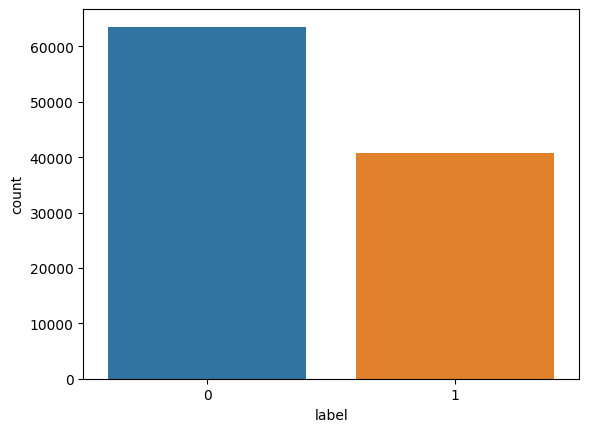

In [20]:
sns.countplot(data=ddos, x='label')
plt.xlabel('label')
plt.ylabel('count')
plt.show()

In [22]:
ddos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

## Let's see which ports are more likely to use which protocol to communicate with every other port for normal activities

In [46]:
most_popular_protocols_src_dst_normal = ddos[ddos['label'] == 0].pivot_table(index='dst', columns='src', values='Protocol', aggfunc=lambda x: x.mode().iloc[0]).fillna(0)
most_popular_protocols_src_dst_normal

src,10.0.0.1,10.0.0.10,10.0.0.11,10.0.0.12,10.0.0.13,10.0.0.14,10.0.0.15,10.0.0.16,10.0.0.17,10.0.0.18,10.0.0.2,10.0.0.20,10.0.0.3,10.0.0.4,10.0.0.5,10.0.0.6,10.0.0.7,10.0.0.8,10.0.0.9
dst,,,,,,,,,,,,,,,,,,,
10.0.0.1,0,0,0,TCP,TCP,TCP,TCP,0,0,0,0,0,ICMP,TCP,0,0,TCP,TCP,0
10.0.0.10,0,0,ICMP,TCP,0,0,0,0,0,0,0,0,ICMP,ICMP,ICMP,ICMP,0,0,TCP
10.0.0.11,0,ICMP,0,TCP,0,0,0,0,0,0,0,0,ICMP,TCP,ICMP,0,ICMP,TCP,0
10.0.0.12,TCP,TCP,TCP,0,0,0,0,TCP,TCP,0,TCP,0,0,0,ICMP,0,ICMP,ICMP,TCP
10.0.0.13,TCP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TCP,0
10.0.0.14,TCP,0,0,0,0,0,0,0,0,0,0,0,TCP,0,0,0,TCP,0,0
10.0.0.15,TCP,0,0,0,0,0,0,0,0,0,0,0,TCP,0,0,0,TCP,0,0
10.0.0.16,0,0,0,0,0,0,0,0,0,0,0,0,TCP,0,TCP,0,0,0,ICMP
10.0.0.17,0,0,0,0,0,0,0,0,0,0,0,0,TCP,0,0,0,0,0,0


### let's see which ports are more likely to use which protocol to communicate with every other port for ddos actions

In [47]:
most_popular_protocols_src_dst_atack = ddos[ddos['label'] == 1].pivot_table(index='dst', columns='src', values='Protocol', aggfunc=lambda x: x.mode().iloc[0]).fillna(0)
most_popular_protocols_src_dst_atack

src,10.0.0.1,10.0.0.10,10.0.0.11,10.0.0.12,10.0.0.13,10.0.0.14,10.0.0.15,10.0.0.16,10.0.0.17,10.0.0.18,10.0.0.2,10.0.0.20,10.0.0.3,10.0.0.4,10.0.0.5,10.0.0.6,10.0.0.7,10.0.0.8,10.0.0.9
dst,,,,,,,,,,,,,,,,,,,
10.0.0.1,0,0,0,TCP,TCP,TCP,TCP,0,0,0,0,0,TCP,TCP,0,0,ICMP,TCP,0
10.0.0.10,0,0,UDP,TCP,ICMP,ICMP,0,0,0,0,0,0,ICMP,0,TCP,0,0,ICMP,TCP
10.0.0.11,0,0,0,TCP,0,0,0,0,0,0,0,0,TCP,TCP,0,0,TCP,TCP,0
10.0.0.12,TCP,TCP,TCP,0,0,0,0,TCP,TCP,0,TCP,0,0,0,ICMP,0,0,0,TCP
10.0.0.13,TCP,ICMP,0,0,0,0,0,0,0,0,0,0,TCP,0,0,0,0,TCP,0
10.0.0.14,TCP,ICMP,0,0,0,0,0,0,0,0,0,0,TCP,TCP,0,0,TCP,0,ICMP
10.0.0.15,0,0,0,0,0,0,0,0,0,0,0,0,TCP,TCP,0,0,TCP,0,0
10.0.0.16,0,0,0,TCP,0,0,0,0,0,0,0,0,TCP,0,TCP,0,0,0,0
10.0.0.17,0,0,0,TCP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Now let's make a graph of which protocols are most often used by ordinary users

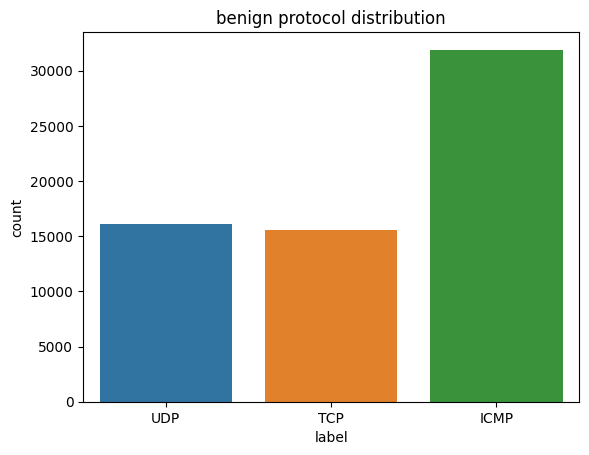

In [14]:
sns.countplot(data=ddos.loc[ddos['label'] == 0], x='Protocol')
plt.xlabel('label')
plt.ylabel('count')
plt.title('benign protocol distribution')
plt.show()

### And what protocols are most often used for ddos attacks

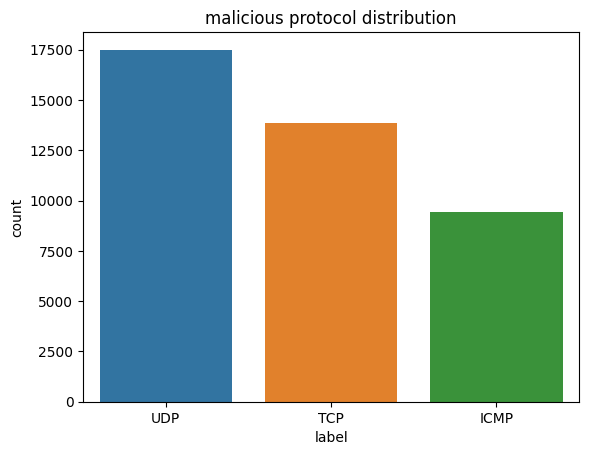

In [15]:
sns.countplot(data=ddos.loc[ddos['label'] == 1], x='Protocol')
plt.xlabel('label')
plt.ylabel('count')
plt.title('malicious protocol distribution')
plt.show()

In [48]:
ddos.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [53]:
ddos.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

### Now let's take a look at the most frequent cyberattacks from which ports

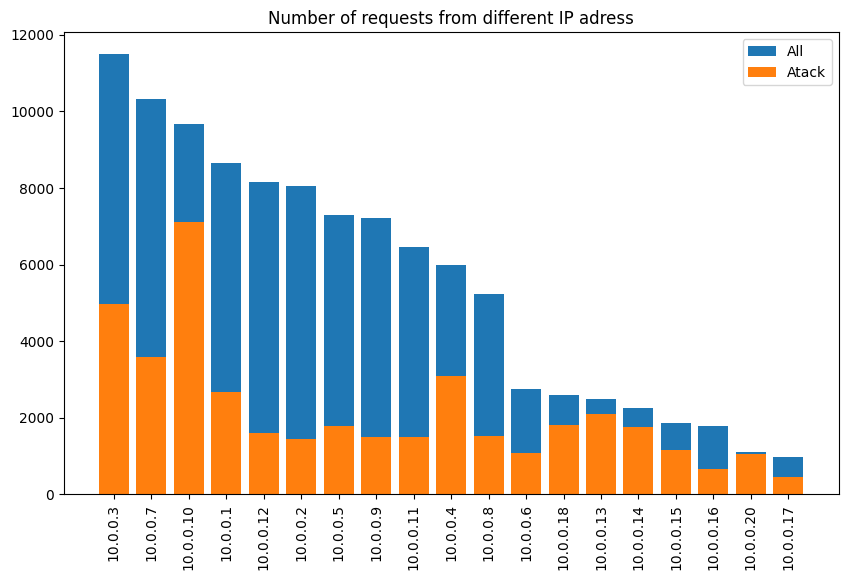

In [65]:
plt.figure(figsize=(10, 6))

src_counts_all = ddos['src'].value_counts()
plt.bar(src_counts_all.index, src_counts_all.values)

src_counts_atack = ddos[ddos['label'] == 1]['src'].value_counts()
plt.bar(src_counts_atack.index, src_counts_atack.values)

plt.legend(['All','Atack'])
plt.title('Number of requests from different IP adress')
plt.xticks(rotation=90)
plt.show()

## Now let's start training the model on predicting cyberattacks

In [3]:
from sklearn.model_selection import train_test_split

# metrics for the classification task
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, average_precision_score, f1_score, precision_score, roc_auc_score

# for preprocess
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#the models that we'll be comparing
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#for computing training time
import time

import warnings
warnings.simplefilter("ignore")

In [4]:
ddos = ddos.fillna(0)
ddos.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [5]:
X, y = ddos.drop(['label'], axis=1), ddos['label']

In [6]:
numerical_cols = ddos.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('label', errors='ignore')
categorical_cols = ddos.select_dtypes(include=['object']).columns

In [7]:
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())]) # Scale numerical data to have mean=0 and variance=1
categorical_transformer =  Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]) #onehoting categorical features
combined = ColumnTransformer(transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)],
        remainder='passthrough')

X_transformed = combined.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=1706) #splitting the data

In [9]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'Kneighbours default': KNeighborsClassifier(),
    'Gradient Boosting Classifier' : GradientBoostingClassifier(),
    'ADA Boost' : AdaBoostClassifier(),
    'Gaussian' : GaussianNB(),
}

evaluation_df = pd.DataFrame({
    'Model': [],
    'Accuracy': [],
    'Average Precision': [],
    'F1': [],
    'roc-auc': [],
    'Training Time (s)': []
})


In [10]:
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    pred = model.predict(X_test)

    training_time = end_time - start_time
    print(f"{name} training is finished...")
    print("Confusion matrix is: ")
    print(pd.DataFrame(confusion_matrix(y_test, pred)))
    print(f"Spended time - {training_time}")
    print("~"*20)
    print("\n")

    accuracy = accuracy_score(y_test, pred)
    avg_precision = average_precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    training_time = end_time - start_time

    evaluation_df = evaluation_df.append({
        'Model': name,
        'Accuracy': accuracy,
        'Average Precision': avg_precision,
        'F1': f1,
        'roc-auc': roc_auc,
        'Training Time (s)': training_time
    }, ignore_index=True)

Logistic Regression training is finished...
Confusion matrix is: 
       0     1
0  11301  1330
1   1949  6289
Spended time - 1.0631814002990723
~~~~~~~~~~~~~~~~~~~~


Decision Tree training is finished...
Confusion matrix is: 
       0     1
0  12630     1
1      0  8238
Spended time - 0.6905496120452881
~~~~~~~~~~~~~~~~~~~~


Random Forest training is finished...
Confusion matrix is: 
       0     1
0  12631     0
1      0  8238
Spended time - 8.084638595581055
~~~~~~~~~~~~~~~~~~~~


SVC training is finished...
Confusion matrix is: 
       0     1
0  12445   186
1    106  8132
Spended time - 144.1132252216339
~~~~~~~~~~~~~~~~~~~~


Kneighbours default training is finished...
Confusion matrix is: 
       0     1
0  12447   184
1    224  8014
Spended time - 0.00627446174621582
~~~~~~~~~~~~~~~~~~~~


Gradient Boosting Classifier training is finished...
Confusion matrix is: 
       0     1
0  12610    21
1     19  8219
Spended time - 35.63261842727661
~~~~~~~~~~~~~~~~~~~~


ADA Boost tra

In [11]:
evaluation_df

,Model,Accuracy,Average Precision,F1,roc-auc,Training Time (s)
0,Logistic Regression,0.842877,0.723541,0.793214,0.829058,1.063181
1,Decision Tree,0.999952,0.999879,0.999939,0.999960,0.690550
2,Random Forest,1.000000,1.000000,1.000000,1.000000,8.084639
3,SVC,0.986008,0.970139,0.982363,0.986204,144.113225
4,Kneighbours default,0.980449,0.961708,0.975176,0.979121,0.006274
5,Gradient Boosting Classifier,0.998083,0.996061,0.997573,0.998016,35.632618
6,ADA Boost,0.995256,0.990321,0.993992,0.995068,7.909197
7,Gaussian,0.668791,0.524504,0.658295,0.693035,0.044507


## A fair win for Random Forest and Decision Tree. But due to training time my preference falls on Decision Tree

Naive Bayes was used as an example because we cannot claim that every event is independent, since DDosers may at the time of DDos start perform small packet sending checks or any other actions shown in this dataset. That's also why his predictions are a bit higher than 50%.